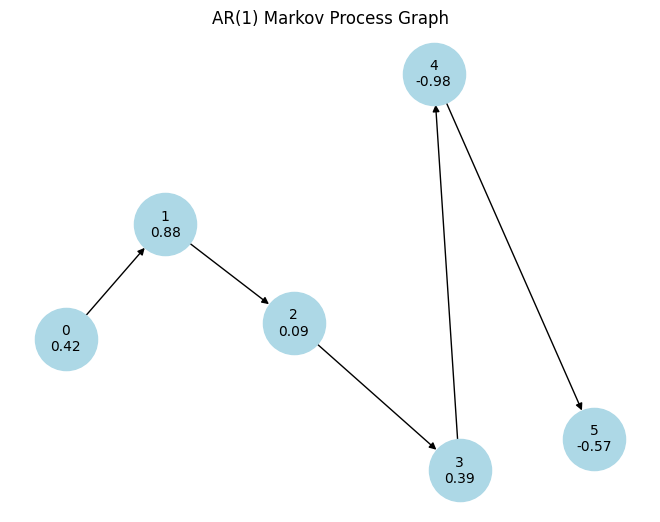

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Parameters
a = 0.5  # Example value for 'a'
sigma2 = 1  # Variance of the noise
sigma = np.sqrt(sigma2)
t = 5  # Length of the time series

# Initialize the time series
x = np.zeros(t + 1)
x[0] = np.random.normal(0, sigma / np.sqrt(1 + a**2))  # x0 ~ N(0, sigma^2 / (1 + a^2))

# Generate the AR(1) process
for i in range(1, t + 1):
    et = np.random.normal(0, sigma)
    x[i] = a * x[i - 1] + et

# Create the graph
G = nx.DiGraph()

# Add nodes
for i in range(t + 1):
    G.add_node(i, value=x[i])

# Add edges
for i in range(1, t + 1):
    G.add_edge(i - 1, i)

# Plot the graph
pos = nx.spring_layout(G)
labels = {i: f'{i}\n{x[i]:.2f}' for i in range(t + 1)}
nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue', node_size=2000, font_size=10, font_color='black', arrows=True)
plt.title('AR(1) Markov Process Graph')
plt.show()



In [5]:
cov_matrix = np.zeros((t + 1, t + 1))
variance = sigma2 / (1 - a**2)

for i in range(t + 1):
    for j in range(t + 1):
        cov_matrix[i, j] = a**abs(i - j) * variance

# Compute the precision matrix
precision_matrix = np.zeros((t + 1, t + 1))
for i in range(t + 1):
    precision_matrix[i, i] = (1 + a**2) / (1 - a**2) if i == 0 or i == t else (1 + a**2) / (1 - a**2)
    if i > 0:
        precision_matrix[i, i-1] = -a / (1 - a**2)
    if i < t:
        precision_matrix[i, i+1] = -a / (1 - a**2)

print("Covariance Matrix:")
print(cov_matrix)
print("\nPrecision Matrix (Inverse of Covariance Matrix):")
print(precision_matrix)

Covariance Matrix:
[[1.33333333 0.66666667 0.33333333 0.16666667 0.08333333 0.04166667]
 [0.66666667 1.33333333 0.66666667 0.33333333 0.16666667 0.08333333]
 [0.33333333 0.66666667 1.33333333 0.66666667 0.33333333 0.16666667]
 [0.16666667 0.33333333 0.66666667 1.33333333 0.66666667 0.33333333]
 [0.08333333 0.16666667 0.33333333 0.66666667 1.33333333 0.66666667]
 [0.04166667 0.08333333 0.16666667 0.33333333 0.66666667 1.33333333]]

Precision Matrix (Inverse of Covariance Matrix):
[[ 1.66666667 -0.66666667  0.          0.          0.          0.        ]
 [-0.66666667  1.66666667 -0.66666667  0.          0.          0.        ]
 [ 0.         -0.66666667  1.66666667 -0.66666667  0.          0.        ]
 [ 0.          0.         -0.66666667  1.66666667 -0.66666667  0.        ]
 [ 0.          0.          0.         -0.66666667  1.66666667 -0.66666667]
 [ 0.          0.          0.          0.         -0.66666667  1.66666667]]
